<p>In this Notebook, I will develop several models <b>(Linear Regression, Multiple Linear Regression, and Polynmial Regression)</b> that will predict the price of the car using the variables or features. Then I will<b> evaluate these models</b> using <b>R-squared and Mean-Squared-Error metrics </b> to find out which model is a better fit for this dataset</p>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4>Linear Regression</h4>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$
 <b>Linear function:</b>
$$
Yhat = a + b  X
$$
<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

I want to look at how highway-mpg can help me predict car price.
Using simple linear regression, I will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


In [163]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg.


In [164]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 We can output a prediction 

In [165]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [166]:
lm.intercept_

38423.305858157386

In [167]:
lm.coef_

array([-821.73337832])

The final estimated linear model is:
    <b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


<p>If I want to predict car price using more than one variable, the solution is:</p>

<h4>Multiple Linear Regression</h4>


<p>I know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [168]:
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y=df['price']
lm.fit(Z,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
lm.intercept_

-15806.624626329198

In [170]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

And the linear function is: 
<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<h4> Model Evaluation using Visualization</h4>

In [171]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

 Let's visualize **highway-mpg** as potential predictor variable of price:

(0, 48293.39019131469)

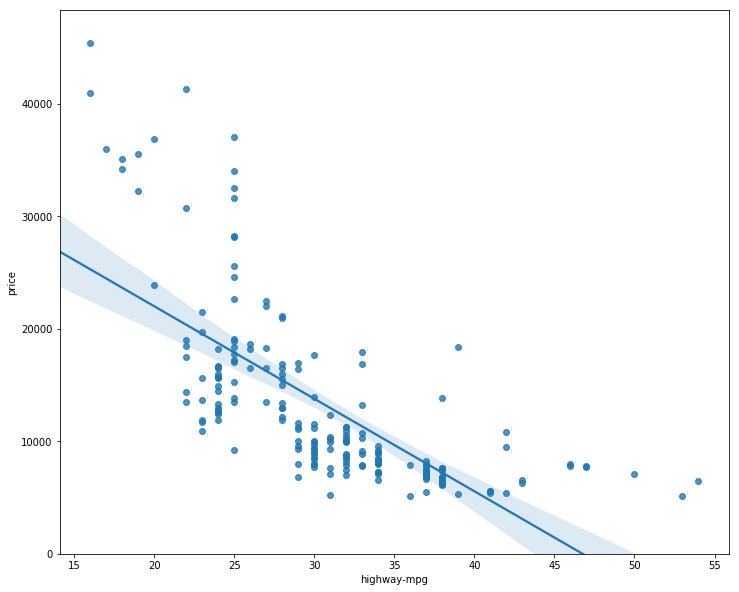

In [172]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg

(0, 47422.919330307624)

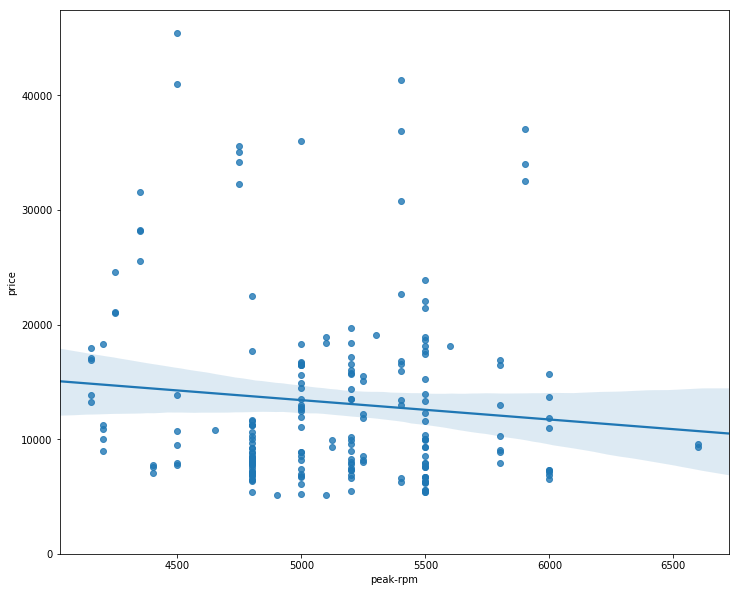

In [173]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [174]:
df[["peak-rpm","highway-mpg","price"]].corr()


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


We can see the variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to   "peak-rpm" which is approximate     -0.101616. 

<h4>Residual Plot</h4>
<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e).</p>
<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>



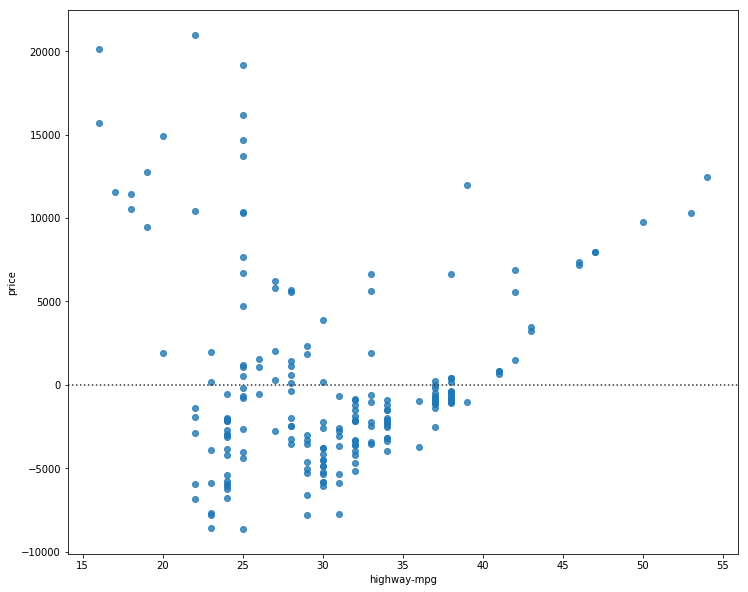

In [175]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, that leads us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h4>Multiple Linear Regression</h4>


In [177]:
Y_hat = lm.predict(Z)

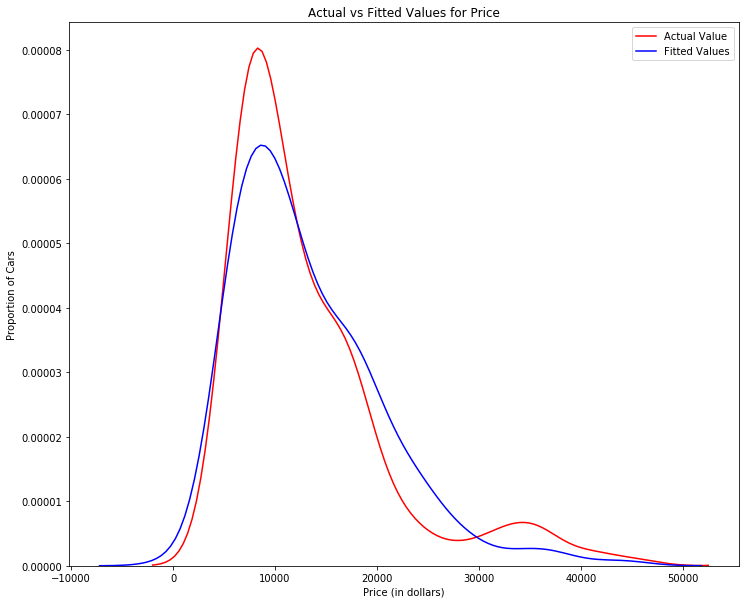

In [178]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h4>Polynomial Regression and Pipelines</h4>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 


<p>We saw that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if I can try fitting a polynomial model to the data instead.</p>


<p>There are different orders of polynomial regression:</p>
<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


In [179]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [180]:
x = df['highway-mpg']
y = df['price']

In [181]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


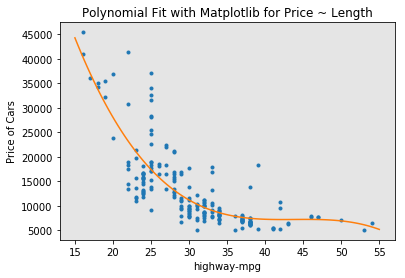

In [182]:
PlotPolly(p, x, y, 'highway-mpg')

In [183]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


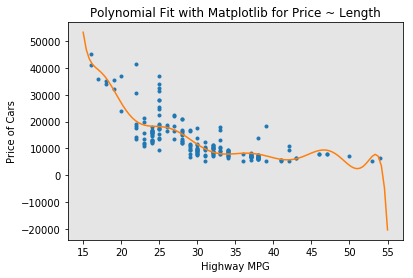

In [201]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

<h4>Models Evaluation</h4>

<p>I want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h4> Let's calculate the R^2 for Simple Linear Regression</h4>

In [185]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
SLR_R2 = lm.score(X, Y)
print('The R-square is: ',SLR_R2)

The R-square is:  0.4965911884339175


<h4> Let's calculate the MSE for Simple Linear Regression</h4>

In [186]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [187]:
from sklearn.metrics import mean_squared_error

In [188]:
SLR_MSE = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', SLR_MSE)

The mean square error of price and predicted value is:  31635042.944639895


<h4> Let's calculate the R^2 for Multiple Linear Regression</h4>

In [189]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
MLR_R2=lm.score(Z, df['price'])
print('The R-square is: ', MLR_R2)

The R-square is:  0.8093562806577457


<h4> Let's calculate the MSE for Multiple Linear Regression</h4>

In [190]:
Y_predict_multifit = lm.predict(Z)

In [191]:
MLR_MSE= mean_squared_error(df['price'], Y_predict_multifit)
print('The mean square error of price and predicted value using multifit is: ', \
      MLR_MSE)

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h4> Let's calculate the R^2 for Polynomial Fit</h4>

In [192]:
from sklearn.metrics import r2_score

In [193]:
Poly_R2 = r2_score(y, p(x))
print('The R-square value is: ', Poly_R2)

The R-square value is:  0.6741946663906513


<h4> Let's calculate the MSE for Polynomial Fit</h4>

In [194]:
Poly_MSE= mean_squared_error(df['price'], p(x))
print('The MSE value is: ', Poly_MSE)

The MSE value is:  20474146.42636125


<h4>Determining a Good Model Fit</h4>

<p>When comparing models, the model with <b> the higher R-squared value </b> and <b> the smallest MSE value </b> is a better fit for the data.

In [195]:
Values_SLR= {'SLR_R2': SLR_R2, 'MLR_R2': MLR_R2, 'Poly_R2':Poly_R2}
print(Values_SLR)
Values_MSE= {'SLR_MSE': SLR_MSE, 'MLR_MSE': MLR_MSE, 'Poly_MSE':Poly_MSE}
print(Values_MSE)

{'SLR_R2': 0.4965911884339175, 'MLR_R2': 0.8093562806577457, 'Poly_R2': 0.6741946663906513}
{'SLR_MSE': 31635042.944639895, 'MLR_MSE': 11980366.87072649, 'Poly_MSE': 20474146.42636125}


In [196]:
max(Values_SLR.items(), key=operator.itemgetter(1))[0]

'MLR_R2'

In [197]:
min(Values_MSE.items(), key=operator.itemgetter(1))[0]

'MLR_MSE'

<p>Comparing these three models, I conclude that <b>the MLR model is the best model</b> to be able to predict price from this dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>